In [1]:
function DoubPen(t,x)
    #this function defines the motion of a double pendulum using the Lagrangian
    #x = [θ1 θ2 ω1 ω2]
    #I need to definel1,l2,m1,m2
    l1 = 2
    l2 = 1
    m1 = 3
    m2 = 1
    g = 9.8
    
    dx = zeros(4)
    
    dx[1] = x[3]
    dx[2] = x[4]
    
    num1 = sin(x[1]-x[2])*(l1*cos(x[1]-x[2])*x[3]^2+x[4]^2)
    dem1 = 2*l2*(1+m1-cos(x[1]-x[2])^2)
    num2 = (1+2*m1)*sin(x[1])+sin(x[1]-2*x[2])
    dem2 = l1*(1+m1-cos(x[1]-x[2])^2)
    
    dx[3] = (num1/dem1)-(num2/dem2)
    
    num3 = (1+m1)*(cos(x[1]+l1*x[3]^2)+cos(x[1]-x[2])*x[4]^2)
    dem3 = 1+m1-cos(x[1]-x[2])^2
    
    dx[4] = sin(x[1]-x[2])*(num3/dem3)
    
    dx
end

DoubPen (generic function with 1 method)

In [2]:
function rungekutta4(f, y₀, Δt, t₀, t₁) 
   
    # fix up Δt so it evenly divides time interval
    N = convert(Int64, round((t₁ - t₀)/Δt))
    Δt = (t₁ - t₀)/N
    Δt2 = Δt/2
    Δt6 = Δt/6
    
    t = linspace(t₀, t₁, N+1)

    y = zeros(N+1, length(y₀))
    y[1,:] = y₀

    for n = 1:N
        yn = y[n,:]
        tn = t[n]
        s1 = f(tn, yn)
        s2 = f(tn + Δt2, yn + Δt2*s1)
        s3 = f(tn + Δt2, yn + Δt2*s2)
        s4 = f(tn + Δt,  yn + Δt *s3)

        y[n+1, :] =  yn + Δt6*(s1+2s2 + 2s3 + s4) # RK4 update formula
    end
    t,y
end



rungekutta4 (generic function with 1 method)

In [3]:
using Plots

In [60]:
x = [0.01,0.01,0.01,0.01];
Δt=0.01;
t1=0;
t2=1500;
t,y = rungekutta4(DoubPen,x,Δt,t1,t2)
#plot(t,y[:,1],color="red")
#plot(y[:,2],y[:,4],xlabel="theta2",ylabel="omega2")#, lims=(-0.15,0.15))
#y

(0.0:0.01:1500.0, [0.01 0.01 0.01 0.01; 0.0100995 0.0101 0.0098995 0.01; … ; -0.000240698 0.0117667 0.00947762 0.0186656; -0.000145711 0.0119525 0.00951972 0.0185049])

In [55]:
#make function that take in output of rungekitta and outputs the points on the Stochawiak-okada plot
# write a function like yp = poincare section (y)
# data structure loop over all data points once and figure out how many zero crossings 
#loop over y find n = number of crossings 
#then say yp equals zeros (N,3)
#ncross = [];
#func poincare(y)
#for n=1:size(y,1)
#loop over y find crossings 
#keep track of crossings 
#ncross.push!(n)
#then loop over 
#yp = [phi2 omeg1 omeg2...]
#values interpolated at ϕ1 equals zeros 
#for n=1:length(ncros)
#        yp [n,:] = interp of phi2... at crossing 
#        end
#yp

In [58]:
function poincaresection(t,y)
    #this function will recreate the plot, ϕ2 vs ω2 found in "A Numerical Analysis of the Double Pendulum System" by Stawhociak and Okada 
    
    #memory allocation
    ncross = []
    ncrossing = []
    t0 = []
    u = []
    y1 = []
    y2 = []
    
    #loop over ϕ1 to find roots where ϕ1 equals 0 and ω1=dϕ1 >0
    for n = 2:size(y,1)
        
        #we want roots with a positive slope, so if the previous element of the solution matrix is negative
        #and the current element is positive, then we get a root with a positive slope
        if (y[n-1,1]<0) && (y[n,1]>0)
            
            #the index of the neg and positive number is pushed into a pair of empty vectors
            push!(ncross,n)
            push!(ncrossing,n-1)

            end 
    end
    
    for n = 1:size(ncross,1)
        
        #the interpolation for the root is found here
        t0 = t[ncross[n]]+((-y[ncross[n],1])*(t[ncrossing[n]]-t[ncross[n]]))/(y[ncrossing[n],1]-y[ncross[n],1])
        
        #the value of ϕ2 and ω2 will be calculated at t where ϕ1=0
        x0 = [0.01,0.01,0.01,0.01]
        Δt=0.01;
        t1=0;
        t2=t0;
        tt,yy = rungekutta4(DoubPen,x0,Δt,t1,t2)
        
        #ϕ2
        push!(y1,yy[end,2])
        push!(y2,yy[end,4])
    end
    plot(y1,y2,seriestype= :scatter)
end

poincaresection (generic function with 1 method)

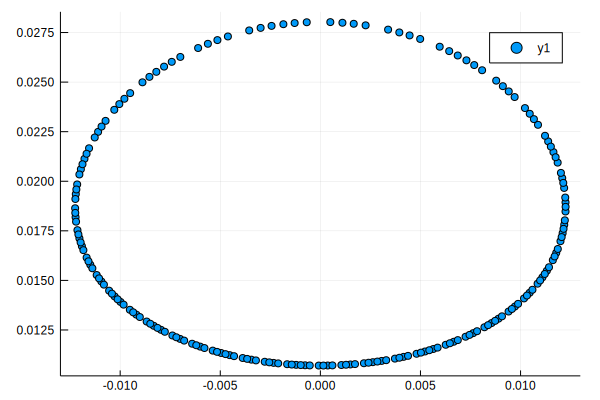

In [59]:
poincaresection(t,y)

In [ ]:
for n = 1:size(ncross,1)
        t0 = t[ncross[n,1]]+((-y[ncross[n,1],1])*(t[ncross[n,2]]-t[ncross[n,1]]))/(y[ncross[n,2],1]-y[ncross[n,1],1])
        x0 = [0.01,0.01,0.01,0.01]
        Δt=0.01;
        t1=0;
        t2=t0;
        tt,yy = rungekutta4(DoubPen,x0,Δt,t1,t2)
        push!(y1,yy[end,2])
        push!(y2,yy[end,4])
    end

In [60]:
function Newton(f, x0, n)
    x = copy(x0)
    x0 = copy(x0)
    fx0 = f(x0)
    m = length(fx0)
    ϵ = 0.0001
    df = zeros(m,m)
    n = copy(n)
    cnt = 0
    
    for Niterations = 1:n
        #here the derivative is calculated numerically
        for j = 1:m
            x_ϵ = copy(x0)
            
            x_ϵ[j] += ϵ
        
            fx_ϵ = f(x_ϵ)
        
            for i = 1:m
                df[i,j] = (fx_ϵ[i] - fx0[i])/ϵ
            end
        end
        #the newton search will be computed here
        
        Δx = -df\fx0
        
        x0 += Δx
        
        cnt = cnt + 1
        
        fx0 = f(x0)
        @show fx0
    end
    x0, fx0, cnt
end

Newton (generic function with 1 method)